# Попытка все оформить

## Функция условной вероятности

Но не совсем условная вероятность: если подаются параметры a и b со значениями 1 и 0, то возвращается 
    
    P(a = 1 | b = 0) = $\frac{|a = 1 & b = 0|}{|a \in {0, 1} & b = 0|}$

В случае, если |a \in {0, 1} & b = 0| = 0, будем возвращать код -1. И вообще выводит вторым элементом denom.

In [95]:
import pandas as pd


def compute_cond_prob(rand_var_name, cond_var_name, rand_var_value, cond_var_value, df):
    """
    Computes the conditional probability
    
    :param rand_var_name: first parameter name
    :param cond_var_name: second parameter name
    :param rand_var_value: 1 or 0
    :param cond_var_value: 1 or 0
    :param df: dataframe
    """
    num = ((df[rand_var_name] == rand_var_value) & (df[cond_var_name] == cond_var_value)).sum()
    denom = ((df[cond_var_name] == cond_var_value) & (df[rand_var_name].isin([0, 1]))).sum()
    if denom == 0:
        return [-1, 0]
    return [round(num/denom, 2), denom]


## Переименование столбцов

Переименование столбцов для standart_stats.csv

In [37]:
sample = pd.read_excel('../data/EasternOromo.xlsx')
param_names = sample["№"].dropna().tolist()
param_names = [str(i) for i in param_names]
param_names = param_names[1:]
len(param_names)

78

In [4]:


stats_ = pd.read_csv("../data/stats.csv")
alt_param_names = stats_.columns.values.tolist()
alt_param_names = alt_param_names[1:-1]
print(len(alt_param_names))

translate = dict()

for i in range(78):
    translate[alt_param_names[i]] = param_names[i]

stats_.rename(columns=translate, inplace=True)

stats_.to_csv("../data/standart_stats.csv",  na_rep='nan')
stats_.head(1)

78


,caritive,1a,1b,1c,1d,1e,2a,2b,2c,2d,...,21b,22a,22b,23a,23b,24a,24b,25a,25b,region
0,hae-1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,Africa


In [ ]:
## Полезные/неполезные

Теперь сами списки

In [6]:
standart_stats_ = pd.read_csv("../data/standart_stats.csv")
useful = list()
useless0 = list()
useless1 = list()

for name in param_names:
    unique_values = set(standart_stats_[name].tolist())
    if unique_values & set([0, 1]) == set([0, 1]):
        useful.append(name)
    if unique_values & set([0, 1]) == set([0]):
        useless0.append(name)
    if unique_values & set([0, 1]) == set([1]):
        useless1.append(name)

print(len(param_names))
print((len(useful), len(useless0), len(useless1)))


78
(77, 1, 0)


In [7]:
print(useless0)

['20b']


In [69]:
print(useless1)
print(useful)

[]
['1a', '1b', '1c', '1d', '1e', '2a', '2b', '2c', '2d', '3', '4', '5a', '5b', '5c', '6a', '6b', '6c', '6d', '6e', '6f', '6g', '6h', '6i', '7', '8a', '8b', '8c', '8d', '8e', '9', '10', '11', '12a', '12b', '12c', '12d', '12e', '13', '14', '15', '16', '17a', '17b', '17c', '18a', '18b', '18c', '19a', '19b', '19c', '19d', '19e', '19f', '19g', '19h', '19i', '19j', '19k', '19l', '19m', '19n', '19o', '19p', '19q', '19r', '19s', '20a', '21a', '21b', '22a', '22b', '23a', '23b', '24a', '24b', '25a', '25b']


In [ ]:
! то есть есть всего один параметр, у которого не встречаются 1 и 0 !

## Проверка соблюдения логики анкеты

In [28]:
stand_stats_ = pd.read_csv("../data/standart_stats.csv")
stand_stats_[(stand_stats_['10'] == 0) & (stand_stats_['11'] == 1)][["10","11"]]

,10,11


In [25]:
stand_stats_[(stand_stats_['10'] == 1) & ((stand_stats_['12a']*0 != 0) | (stand_stats_['12e']*0 != 0))][["caritive", "10", "12a", "12b"]].head()

,caritive,10,12a,12b
27,hau-4,1.0,0.0,0.0
30,fin-1,1.0,0.0,0.0
31,fin-2,1.0,0.0,0.0
32,fin-3,1.0,0.0,0.0
33,fin-4,1.0,0.0,0.0


In [29]:
stand_stats_[(stand_stats_["1a"] != stand_stats_["2a"]) & (stand_stats_["1b"] != stand_stats_["2a"])][["caritive", "1a", "1b", "2a"]]

,caritive,1a,1b,2a
29,eus-1,0.0,0.0,1.0
69,lep-4,0.0,0.0,1.0
151,apu-1,1.0,0.0,NaN


In [30]:
stand_stats_[stand_stats_["1c"] != stand_stats_["2b"]][["caritive", "1c", "2b"]]

,caritive,1c,2b
1,hae-2,NaN,0.0
12,heb-5,1.0,0.0
16,yor-2,1.0,0.0
20,sad-1,1.0,0.0
66,lep-1,1.0,0.0
72,lep-7,NaN,0.0
95,cns-2,NaN,NaN
110,mpb-1,0.0,1.0
131,nav-3,NaN,0.0
137,lkt-2,0.0,1.0


In [34]:
compute_cond_prob("10", "11", 0, 1, stand_stats_)

0

## Запись всех условных вероятностей в отдельный файл

In [68]:
df = pd.read_csv("../data/standart_stats.csv")
print(((df["10"] == 1) & (df["11"].isin([0, 1]))).sum())
compute_cond_prob("11", "10", 1, 1, df)

81


81

In [99]:
data = pd.read_csv("../data/standart_stats.csv")


probs_list00 = list()
denoms_list00 = list()

probs_list11 = list()
denoms_list11 = list()

for rand_var in useful:
    for cond_var in useful:
        if rand_var != cond_var:
            prob00, denom00 = compute_cond_prob(rand_var, cond_var, 0, 0, data)
            probs_list00.append([rand_var, cond_var, prob00])
            denoms_list00.append([rand_var, cond_var, denom00])
            
            prob11, denom11 = compute_cond_prob(rand_var, cond_var, 1, 1, data)
            probs_list11.append([rand_var, cond_var, prob11])
            denoms_list11.append([rand_var, cond_var, denom11])
            
df_probs00 = pd.DataFrame(probs_list00, columns=['X','Y','Z'])
df_denoms00 = pd.DataFrame(denoms_list00, columns=['X','Y','Z'])


df_probs11 = pd.DataFrame(probs_list11, columns=['X','Y','Z'])
df_denoms11 = pd.DataFrame(denoms_list11, columns=['X','Y','Z'])
df_probs00

,X,Y,Z
0,1a,1b,0.84
1,1a,1c,0.78
2,1a,1d,0.85
3,1a,1e,0.78
4,1a,2a,0.99
...,...,...,...
5847,25b,23a,0.56
5848,25b,23b,0.50
5849,25b,24a,1.00
5850,25b,24b,1.00


In [100]:
df_probs00 = df_probs00.pivot(index='X', columns='Y', values='Z')
df_denoms00 = df_denoms00.pivot(index='X', columns='Y', values='Z')

df_probs11 = df_probs11.pivot(index='X', columns='Y', values='Z')
df_denoms11 = df_denoms11.pivot(index='X', columns='Y', values='Z')
df_denoms11

Y,10,11,12a,12b,12c,12d,12e,13,14,15,...,6g,6h,6i,7,8a,8b,8c,8d,8e,9
X,,,,,,,,,,,,,,,,,,,,,
10,NaN,49.0,14.0,19.0,36.0,41.0,9.0,14.0,58.0,50.0,...,13.0,23.0,13.0,86.0,91.0,7.0,87.0,88.0,84.0,26.0
11,81.0,NaN,15.0,19.0,36.0,41.0,10.0,14.0,58.0,51.0,...,13.0,23.0,13.0,86.0,91.0,7.0,88.0,88.0,84.0,26.0
12a,80.0,48.0,NaN,17.0,33.0,38.0,10.0,14.0,58.0,50.0,...,13.0,22.0,13.0,84.0,90.0,7.0,87.0,87.0,81.0,26.0
12b,81.0,49.0,14.0,NaN,34.0,41.0,9.0,14.0,56.0,49.0,...,13.0,23.0,13.0,86.0,90.0,7.0,87.0,86.0,82.0,26.0
12c,81.0,49.0,15.0,19.0,NaN,41.0,10.0,14.0,58.0,51.0,...,13.0,22.0,13.0,85.0,91.0,7.0,88.0,87.0,85.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8b,22.0,17.0,4.0,5.0,4.0,9.0,2.0,5.0,19.0,16.0,...,6.0,9.0,5.0,38.0,30.0,NaN,25.0,29.0,31.0,10.0
8c,58.0,39.0,11.0,13.0,21.0,21.0,7.0,13.0,43.0,38.0,...,11.0,16.0,11.0,71.0,72.0,7.0,NaN,60.0,61.0,14.0
8d,58.0,36.0,5.0,9.0,24.0,27.0,4.0,12.0,43.0,39.0,...,8.0,15.0,10.0,75.0,65.0,7.0,60.0,NaN,65.0,22.0


In [101]:
df_probs00.to_csv("../data/probs00.csv")
df_denoms00.to_csv("../data/denoms00.csv")

df_probs11.to_csv("../data/probs11.csv")
df_denoms11.to_csv("../data/denoms11.csv")


## Найти наибольший декартов прямоугольник

Проблема: у нас слишком много отсутстующих значений. Прямо очень много: на 78*171 = 13338 ячеек у нас 5958 пропусков -- почти половина!

In [6]:
import pandas as pd
standart_stats_ = pd.read_csv("../data/standart_stats.csv")
columns_names = standart_stats_.columns.values.tolist()
columns_names = columns_names[2:-1]
number_of_nuns = 0
for column in columns_names:
    number_of_nuns += standart_stats_[column].isna().sum()
number_of_nuns

5958

Поэтому попробуем найти декартово произведение побольше, в котором бы было заполнено _всё_. Для этого сначала сделаем таблицу, где 0 или 1 -- это 1, а нан -- это 0

In [65]:
import pandas as pd
data_appearance_ = pd.read_csv("../data/standart_stats.csv")
columns_names = data_appearance_.columns.values.tolist()
columns_names = columns_names[2:-1]

for column in columns_names:
    data_appearance_.loc[data_appearance_[column] == 0, column] = 1
    data_appearance_.loc[data_appearance_[column]*0 != 0, column] = 0

del data_appearance_["region"]
del data_appearance_["caritive"]
data_appearance_.to_csv("../data/data_appearance.csv")
number_of_zeroes = 0
for column in columns_names:
    number_of_zeroes += (data_appearance_[column] == 0).sum()
number_of_zeroes

5958

In [66]:
data_appearance_

,id,1a,1b,1c,1d,1e,2a,2b,2c,2d,...,21a,21b,22a,22b,23a,23b,24a,24b,25a,25b
0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,166,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
167,167,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
168,168,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
169,169,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Теперь напишем сортировку, которая ищет лучший квадрат, но при этом умеет двигать только строки. Вообще найти ЛУЧШИЙ квадрат не очень понятно как за разумное время, поэтому решим эту задачу примерно: будем поочередно делать лучший квадрат, то разрешая менять строки, то разрешая менять столбцы (местами)

Сначала получим результат для перестановок строк, реализовав алгоритм из https://codeforces.com/contest/376/problem/D

In [89]:
import pandas as pd
import numpy as np
data_appearance_ = pd.read_csv("../data/data_appearance.csv")
del data_appearance_['id']
da = data_appearance_.to_numpy()
rights = da
for i in reversed(range(1, len(da[0])-1)):
    for j in range(len(rights)):
        rights[j, i] = rights[j, i] * rights[j, i+1] + rights[j, i]

pandas_rights = pd.DataFrame(data=rights[0:,0:])
pandas_rights


,0,1,2,3,4,5,6,7,8,9,...,69,70,71,72,73,74,75,76,77,78
154,154.0,0.0,8.0,7.0,6.0,5.0,4.0,3.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
72,72.0,1.0,0.0,0.0,0.0,0.0,4.0,3.0,2.0,1.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0,7.0,6.0,5.0,4.0,3.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
95,95.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
131,131.0,2.0,1.0,0.0,15.0,14.0,13.0,12.0,11.0,10.0,...,8.0,7.0,6.0,5.0,4.0,3.0,2.0,1.0,0.0,0.0
151,151.0,5.0,4.0,3.0,2.0,1.0,0.0,9.0,8.0,7.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
153,153.0,7.0,6.0,5.0,4.0,3.0,2.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94,94.0,7.0,6.0,5.0,4.0,3.0,2.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
67,67.0,8.0,7.0,6.0,5.0,4.0,3.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
71,71.0,8.0,7.0,6.0,5.0,4.0,3.0,2.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [82]:
rights = rights.transpose()
rights_list = rights.tolist()
rights_list[1][170]

10.0

In [88]:
rights = rights.transpose()
rights_list = rights.tolist()
answer = 1
beginning_parameter = 0
number_after_sorting = 0

for i in range (1, 78):
    rights_list[i].sort()
    
    for j in range(170):
        if (rights_list[i][j] * (171-j) > answer) :
            answer = rights_list[i][j] * (171-j);
            beginning_parameter = i
            number_after_sorting = j
print(answer, beginning_parameter, number_after_sorting)

1304.0 1 8


In [90]:
pandas_rights.sort_values(1)
number_of_zeroes = 0
pandas_rights.sort_values(1).head(10)

,0,1,2,3,4,5,6,7,8,9,...,69,70,71,72,73,74,75,76,77,78
154,154.0,0.0,8.0,7.0,6.0,5.0,4.0,3.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
72,72.0,1.0,0.0,0.0,0.0,0.0,4.0,3.0,2.0,1.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0,7.0,6.0,5.0,4.0,3.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
95,95.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
131,131.0,2.0,1.0,0.0,15.0,14.0,13.0,12.0,11.0,10.0,...,8.0,7.0,6.0,5.0,4.0,3.0,2.0,1.0,0.0,0.0
151,151.0,5.0,4.0,3.0,2.0,1.0,0.0,9.0,8.0,7.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
153,153.0,7.0,6.0,5.0,4.0,3.0,2.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94,94.0,7.0,6.0,5.0,4.0,3.0,2.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
67,67.0,8.0,7.0,6.0,5.0,4.0,3.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
71,71.0,8.0,7.0,6.0,5.0,4.0,3.0,2.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Ну то есть пока вот такой результат: почти во всех каритивах (163 из 171) проставлены ну хотя бы как-то первые 8 парамтеров -- от 1a до 2c. Это все достаточно связанные параметры, вот что важно.

Теперь запишем в отдельный датафрейм все записи, кроме тех, у кого не заполнено все в параметрах 1a - 2c. 

In [108]:
pandas_rights = pd.DataFrame(data=rights[0:,0:])
standart_stats_ = pd.read_csv("../data/standart_stats.csv")
cartesian_product = standart_stats_[pandas_rights[1] >= 8][["1a", "1b", "1c", "1d", "1e", "2a", "2b", "2c"]]
cartesian_product

,1a,1b,1c,1d,1e,2a,2b,2c
0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
166,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
167,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
168,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
169,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


Поэксперементируем с величиной дерева решений. Каждый параметр будет поочередно становиться целевым.

[Text(0.5, 0.8333333333333334, 'X[4] <= 0.5\ngini = 0.47\nsamples = 114\nvalue = [71, 43]'),
 Text(0.25, 0.5, 'X[3] <= 0.5\ngini = 0.151\nsamples = 73\nvalue = [67, 6]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.06\nsamples = 65\nvalue = [63, 2]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.5\nsamples = 8\nvalue = [4, 4]'),
 Text(0.75, 0.5, 'X[6] <= 0.5\ngini = 0.176\nsamples = 41\nvalue = [4, 37]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.1\nsamples = 38\nvalue = [2, 36]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]')]

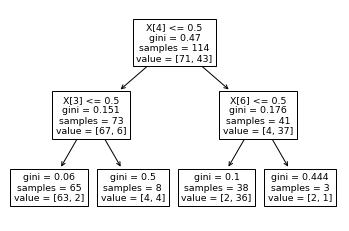

In [125]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics

list_of_dicts = []

dict2train = dict()
dict2test = dict()

dict2train["row"] = "train score with height 2"
dict2test["row"] = "test score with height 2"



for target in cartesian_product.columns.tolist():
    not_target = []
    for column in cartesian_product.columns.tolist():
        if column != target:
            not_target.append(column)
    y = cartesian_product[[target]]
    X = cartesian_product[not_target]
    
    clf = DecisionTreeClassifier(max_depth=2)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    dict2train[target] = str(round(clf.score(X_train, y_train), 3))
    dict2test[target] = str(round(clf.score(X_test, y_test), 3))
    
list_of_dicts.append(dict2train)
list_of_dicts.append(dict2test)
tree.plot_tree(clf)


In [123]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

list_of_dicts = []

dict2train = dict()
dict2test = dict()

for i in range(2, 8):
    dicttrain = dict()
    dicttest = dict()
    dictaver = dict()
    dicttrain["row"] = "train score with max height=" + str(i)
    dicttest["row"] = "test score with max height=" + str(i)
    dictaver["row"] = "average score with max height=" + str(i)


    for target in cartesian_product.columns.tolist():
        not_target = []
        for column in cartesian_product.columns.tolist():
            if column != target:
                not_target.append(column)
        y = cartesian_product[[target]]
        X = cartesian_product[not_target]
    
        clf = DecisionTreeClassifier(max_depth=i)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)
        clf = clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
    
        dicttrain[target] = str(round(clf.score(X_train, y_train), 3))
        dicttest[target] = str(round(clf.score(X_test, y_test), 3))
        dictaver[target] = str(round((float(dicttrain[target]) + float(dicttest[target]))/2, 3))
        
    
    list_of_dicts.append(dictaver)
    

pd.DataFrame(list_of_dicts)

,row,1a,1b,1c,1d,1e,2a,2b,2c
0,average score with max height=2,0.981,0.966,0.949,0.943,0.953,0.956,0.949,0.909
1,average score with max height=3,0.986,0.966,0.948,0.948,0.953,0.956,0.943,0.932
2,average score with max height=4,0.99,0.97,0.948,0.965,0.953,0.956,0.943,0.966
3,average score with max height=5,0.99,0.97,0.966,0.965,0.966,0.956,0.943,0.966
4,average score with max height=6,0.99,0.97,0.966,0.965,0.966,0.956,0.943,0.966
5,average score with max height=7,0.99,0.97,0.966,0.965,0.966,0.956,0.943,0.966
